In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import re
import datetime
import pylab as pl
pl.style.use('fivethirtyeight')
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot

In [7]:
c = pd.read_csv('twitter.csv', parse_dates=['date'])

In [8]:
c.columns

Index([u'date', u'tweet_count', u'sentiment', u'brk_streak_day_before',
       u'brk_streak_day_of', u'nyk_streak_day_before', u'nyk_streak_day_of',
       u'nyk_days', u'brk_days'],
      dtype='object')

In [13]:
c['dt'] = pd.to_datetime(c['date'], format='%b_%d_%Y')

In [15]:
c['dow'] = c['dt'].dt.dayofweek

In [24]:
c['month'] = c['dt'].dt.month

                            OLS Regression Results                            
Dep. Variable:              sentiment   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     3.065
Date:                Tue, 03 Nov 2015   Prob (F-statistic):              0.100
Time:                        16:58:38   Log-Likelihood:                 37.643
No. Observations:                  17   AIC:                            -71.29
Df Residuals:                      15   BIC:                            -69.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Intercept                 0.58

c:\Users\Jeremy\Anaconda\lib\site-packages\scipy\stats\stats.py:1233: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  int(n))


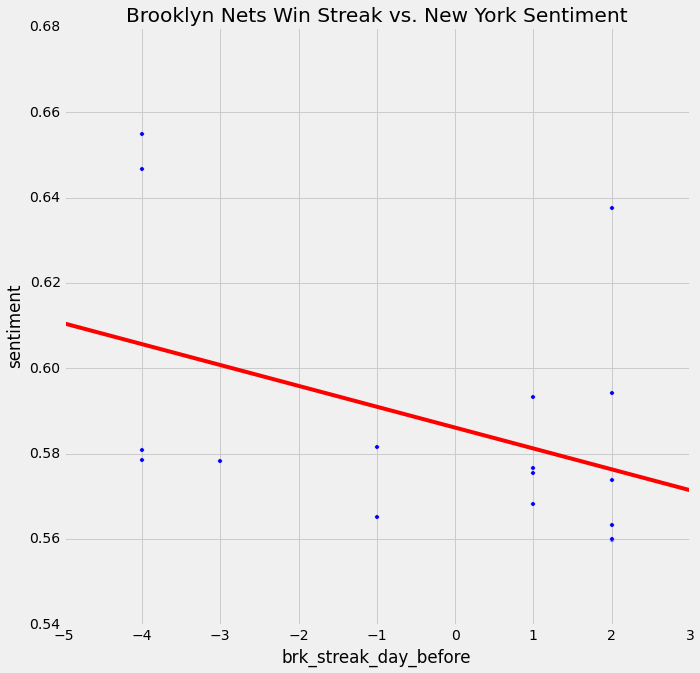

In [6]:
figure, ax = pl.subplots(figsize=(10,10))
c.plot('brk_streak_day_before', 'sentiment', kind='scatter', ax=ax)
mod = smf.ols(formula='sentiment ~ brk_streak_day_before', data = c).fit()
print mod.summary()
abline_plot(model_results=mod, ax=ax, color='red')
ax.set_title('Brooklyn Nets Win Streak vs. New York Sentiment')

                            OLS Regression Results                            
Dep. Variable:              sentiment   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     20.59
Date:                Mon, 09 Nov 2015   Prob (F-statistic):           0.000393
Time:                        14:52:13   Log-Likelihood:                 43.406
No. Observations:                  17   AIC:                            -82.81
Df Residuals:                      15   BIC:                            -81.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Intercept                 0.63

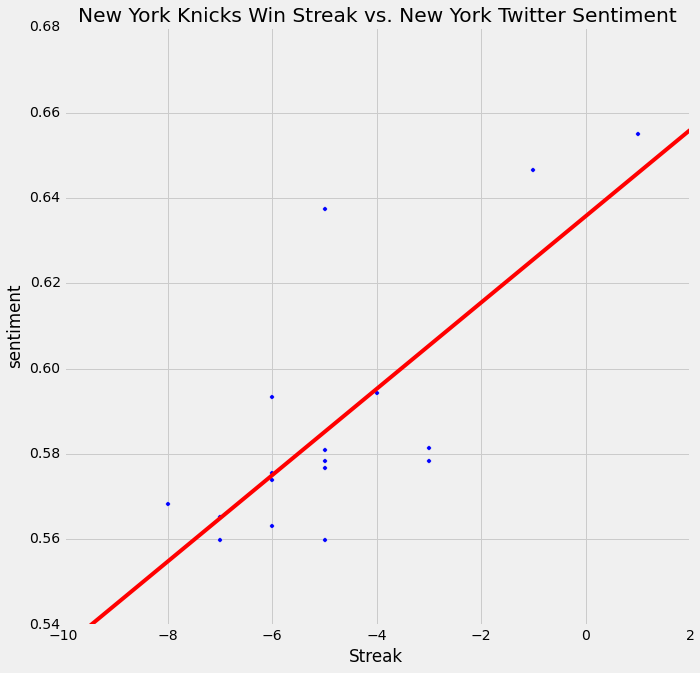

In [21]:
figure, ax = pl.subplots(figsize=(10,10))
c.plot('nyk_streak_day_before', 'sentiment', kind='scatter', ax=ax)
mod = smf.ols(formula='sentiment ~ nyk_streak_day_before', data = c).fit()
print mod.summary()
abline_plot(model_results=mod, ax=ax, color='red')
ax.set_title('New York Knicks Win Streak vs. New York Twitter Sentiment')
ax.set_xlabel('Streak')

In [25]:
mod = smf.ols(formula='sentiment ~ nyk_streak_day_before + brk_streak_day_before + C(month)', data = c).fit()
print mod.summary()

                            OLS Regression Results                            
Dep. Variable:              sentiment   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     17.68
Date:                Mon, 09 Nov 2015   Prob (F-statistic):           5.71e-05
Time:                        14:55:11   Log-Likelihood:                 52.473
No. Observations:                  17   AIC:                            -94.95
Df Residuals:                      12   BIC:                            -90.78
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Intercept                 0.58

                            OLS Regression Results                            
Dep. Variable:              sentiment   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     6.775
Date:                Mon, 09 Nov 2015   Prob (F-statistic):             0.0200
Time:                        14:49:47   Log-Likelihood:                 39.231
No. Observations:                  17   AIC:                            -74.46
Df Residuals:                      15   BIC:                            -72.80
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept             0.5839      0.00

c:\Users\Jeremy\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


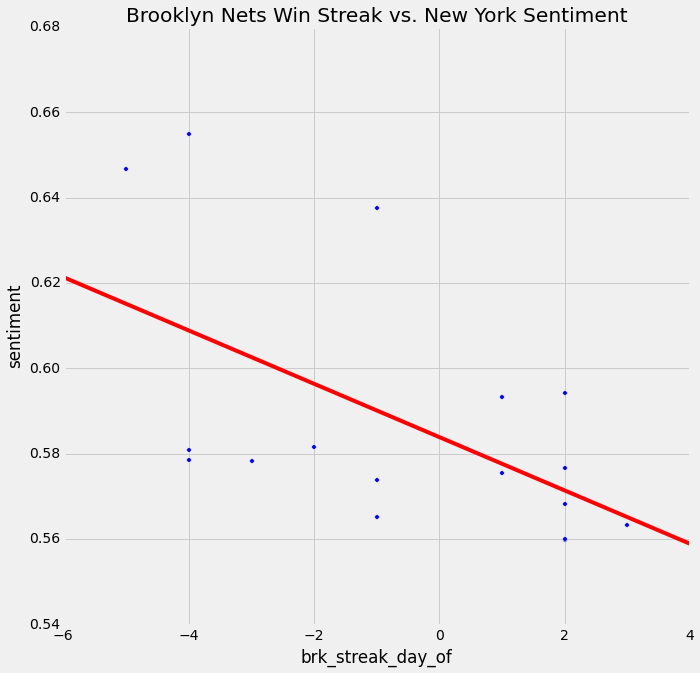

In [18]:
figure, ax = pl.subplots(figsize=(10,10))
c.plot('brk_streak_day_of', 'sentiment', kind='scatter', ax=ax)
mod = smf.ols(formula='sentiment ~ brk_streak_day_of', data = c).fit()
print mod.summary()
abline_plot(model_results=mod, ax=ax, color='red')
ax.set_title('Brooklyn Nets Win Streak vs. New York Sentiment')

                            OLS Regression Results                            
Dep. Variable:              sentiment   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     14.13
Date:                Tue, 03 Nov 2015   Prob (F-statistic):            0.00189
Time:                        17:02:52   Log-Likelihood:                 41.705
No. Observations:                  17   AIC:                            -79.41
Df Residuals:                      15   BIC:                            -77.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept             0.6478      0.01

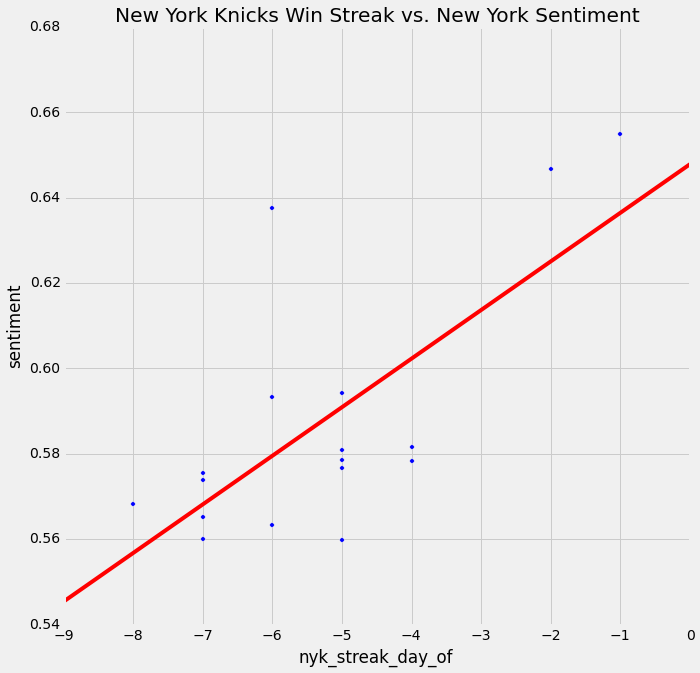

In [10]:
figure, ax = pl.subplots(figsize=(10,10))
c.plot('nyk_streak_day_of', 'sentiment', kind='scatter', ax=ax)
mod = smf.ols(formula='sentiment ~ nyk_streak_day_of', data = c).fit()
print mod.summary()
abline_plot(model_results=mod, ax=ax, color='red')
ax.set_title('New York Knicks Win Streak vs. New York Sentiment')

In [14]:
mod = smf.ols(formula='sentiment ~ nyk_streak_day_before + nyk_streak_day_of + brk_streak_day_before + brk_streak_day_of + nyk_days + brk_days', data = c).fit()
print mod.summary()

                            OLS Regression Results                            
Dep. Variable:              sentiment   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     3.648
Date:                Tue, 03 Nov 2015   Prob (F-statistic):             0.0349
Time:                        17:05:55   Log-Likelihood:                 45.919
No. Observations:                  17   AIC:                            -77.84
Df Residuals:                      10   BIC:                            -72.01
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Intercept                 0.62

In [15]:
mod = smf.ols(formula='sentiment ~ nyk_streak_day_before + brk_streak_day_before + nyk_days + brk_days', data = c).fit()
print mod.summary()

                            OLS Regression Results                            
Dep. Variable:              sentiment   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     5.335
Date:                Tue, 03 Nov 2015   Prob (F-statistic):             0.0105
Time:                        17:06:15   Log-Likelihood:                 44.748
No. Observations:                  17   AIC:                            -79.50
Df Residuals:                      12   BIC:                            -75.33
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Intercept                 0.64

In [16]:
mod = smf.ols(formula='sentiment ~ nyk_streak_day_before + nyk_days', data = c).fit()
print mod.summary()

                            OLS Regression Results                            
Dep. Variable:              sentiment   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     10.22
Date:                Tue, 03 Nov 2015   Prob (F-statistic):            0.00184
Time:                        17:07:41   Log-Likelihood:                 43.713
No. Observations:                  17   AIC:                            -81.43
Df Residuals:                      14   BIC:                            -78.93
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Intercept                 0.64

In [18]:
c.corr()

,tweet_count,sentiment,brk_streak_day_before,brk_streak_day_of,nyk_streak_day_before,nyk_streak_day_of,nyk_days,brk_days
tweet_count,1.000000,-0.228614,0.051764,0.071991,-0.249894,-0.289429,0.152484,0.074444
sentiment,-0.228614,1.000000,-0.411926,-0.557806,0.760578,0.696517,-0.126909,-0.041644
brk_streak_day_before,0.051764,-0.411926,1.000000,0.901701,-0.615349,-0.671050,-0.481059,-0.463217
brk_streak_day_of,0.071991,-0.557806,0.901701,1.000000,-0.640967,-0.638978,-0.394086,-0.449701
nyk_streak_day_before,-0.249894,0.760578,-0.615349,-0.640967,1.000000,0.974270,-0.006118,-0.041878
nyk_streak_day_of,-0.289429,0.696517,-0.671050,-0.638978,0.974270,1.000000,0.087117,0.041760
nyk_days,0.152484,-0.126909,-0.481059,-0.394086,-0.006118,0.087117,1.000000,0.885251
brk_days,0.074444,-0.041644,-0.463217,-0.449701,-0.041878,0.041760,0.885251,1.000000
